# Gram Schmidt Orthogonalization
## *Definition*
Gram Schmidt Orthogonalization is a process by which, given any finite basis $B = \{b_1,\ldots,b_n\}$ of $\mathbb{R}^n$, we convert it to an orthonormal basis of $\mathbb{R}^n$.

The resulting orthonormal set $U = \{u_1, \ldots, u_n\}$ is defined by  

$$u_i^Tu_j = 
\begin{cases} 0 & \text{if } i \neq j\\ 1  &\text{if } i = j\end{cases}$$

$U$ is an orthonormal basis of $\mathbb{R}^n$, and the matrix $[u_1,\ldots,u_n]$ is orthonormal: $U^T = U^{-1}$, or,

$$U^TU = UU^T = I_n.$$

## *Process*
To generate $u_1$, the first vector in $U$, we normalize the first vector, $b_1$, in $B$. So 

$$u_1 = \frac{b_1}{||b_1||}.$$ 

Let $b_i$ and $u_i$ be the $i^{th}$ vectors of $B$ and $U$ respectively. For every $i=2,\ldots,n$, we construct $u_i$ by iteratively subtracting from $b_i$ the projection of $b_i$ onto the subspace spanned by the vectors so far generated of $U$; i.e.

$$u_i = b_i - \sum_{j=1}^{i-1} \text{proj}_{u_j}(b_i)$$

where the projection of a vector $y$ onto the span of a vector $x$ is defined by

$$\text{proj}_{x}(y) = \frac{x^Ty}{x^Tx}x.$$



#Gram-Schmidt Code

In [10]:
# Gram-Schmidt Code
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy

# works if columns are linearly independent and/or the matrix is square
# number of columns in A has to be less than or equal to the number of rows of A
def gramschmidt_givenBasis(A, tol = 1e-14):

  original=copy.deepcopy(A)
  m, n = np.shape(A)[0], np.shape(A)[1]
  
  print("Original Matrix:")
  print(A)

  if m < n: 
    print("Matrix entered is not a basis.")
    return("Exit") 

  #if m==n or m>n:
  else:
    #perform SVD
    #if any singular values are zero: return
    u,s,vh = np.linalg.svd(A)
    print("Singular Values", s)
    for singularValue in s:
      if singularValue < tol:
        print("Matrix entered is not a basis.")
        return("Exit") 
    
  #normalize the first column (u1)
  A[:,0] = A[:, 0] / norm(A[:,0])

  #loop through each vector in the original basis
  for i in range(1, n):
    Ai = A[:,i]
    #loop through the vectors generated so far of the new basis
    for j in range(0, i):
      Aj = A[:,j]
      #current old vec minus projection of itself onto the current new vector
      Ai = Ai - ((Aj.dot(Ai)) / (norm(Aj)) ** 2) * Aj
    #normalize
    A[:, i] = normalize(Ai)

  # visualization
  # visualize original and resulting 2D vectors
  if n == 2 and m==2:
    total_rows = 2*m
    plotVectors2D(original, A, m=total_rows)
  
  # visualize original and resulting 2D vectors when linear dependence 
  if m==2 and n==1:
    total_rows = n+m
    plotVectors2D(original, A, m=total_rows)

  #visualize original and resulting 3D vectors  
  if n==3 and m==3:
    total_rows = 2*m
    plotVectors3D(original,A, n,m=total_rows)
    
  #visualize original and resulting 3D vectors when linear dependence or rectangular m>n
  if n<3 and m==3:
    total_rows = original.shape[1]+A.shape[1]
    plotVectors3D(original,A, n,m=total_rows)  
  return A

def norm(v):
  return np.sqrt(v.dot(v))

def normalize(v):
  return v / norm(v)

def plotVectors2D(original,orthonormal, m):
  zeros = np.zeros((m,2))
  temp = np.concatenate((np.transpose(original),np.transpose(orthonormal)), axis=0)
  final = np.concatenate((zeros,temp),axis=1)

  X, Y, U, V = zip(*final)

  min = np.floor(np.min((X,Y,U,V))) - 1
  max = np.ceil(np.max((X,Y,U,V))) + 1

  #make axis scales identical 

  plt.figure()
  ax = plt.gca()
  ax.quiver(X,Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["g","g","r","r"])
  ax.set_xlim([min, max])
  ax.set_ylim([min, max])
  plt.gca().set_aspect('equal', adjustable='box')

def plotVectors3D(original,orthonormal, n,m):
  zeros = np.zeros((m,3))
  temp = np.concatenate((np.transpose(original),np.transpose(orthonormal)), axis=0)
  final = np.concatenate((zeros,temp),axis=1)

  mid = original.shape[1]
  X, Y, Z, U, V, W = zip(*final)

  min = np.floor(np.min((X,Y,Z,U,V,W))) - 1
  max = np.ceil(np.max((X,Y,Z,U,V,W))) + 1

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.quiver(X[:mid], Y[:mid], Z[:mid], U[:mid], V[:mid], W[:mid],color=["r"])
  ax.quiver(X[mid:], Y[mid:], Z[mid:], U[mid:], V[mid:], W[mid:],color=["b"])
  ax.set_xlim([min, max])
  ax.set_ylim([min, max])
  ax.set_zlim([min, max])
  ax.view_init(0,20)

#square matrix m=n 
A = np.array([[4.0, 3.0], [4.0, 1.5]])
A = np.array([[1 (-1/2) (-1/6) (-1/6)],[0 (2/3) (-1/6) (-1/6)]])
#A = np.array([[1 (-1/2) (-1/6) (-1/6)],[0 (2/3) (-1/6) (-1/6)],[0 (-1/3) (5/6) (-1/6)],[0 (-1/3) (-1/6) (5/6)],[0 (-1/3) (-1/6) (-1/6)],[-1 (2/3) (-1/6) (-1/6)]])

#square matrix m=n, dependent rows
#A = np.array([[3.0, 1.0, 2.0, 2.0], [6.0, 2.0, 4.0, 4.0], [1.0, 5.0, 3.0, 4.0], [5.0, 5.1, 3.1, 2.1]])

#rectangular matrix, m>n, linearlly independent
#A = np.array([[1.0,2.0],[1.0,2.0],[1.0,5.0]])

#rectangular matrix, m<n. 
#A = np.array([[1.0,1.0,1.0],[2.0,3.0,5.0]]) 

#visualizing 2D
#A = np.array([[4.0, 3.0], [4.0, 1.5]])

#visualizing 2D with dependence
#A = np.array([[4.0, 3.0], [2.0, 1.5]])

#visualizing 3D 
#A = np.array([[1.0,  1.0, 0], [3.0, 0.0, 0], [2.0, 1, 2.0]])

#visualizing 3D with dependence
#A = np.array([[1.0,  0.0, 0], [3.0, 0.0, 0], [2.0, 1, 2.0]])

Q = gramschmidt_givenBasis(A)
if Q is "Exit":
  pass
else:
  print("Orthonormal matrix Q:")
  print(Q)
  print("Q^T * Q:")
  print(np.round(Q.transpose().dot(Q)))

TypeError: ignored

Original matrix:
[[4.  3. ]
 [4.  1.5]
 [4.  1.5]]
Orthonormal matrix Q:
[[ 0.57735027  0.81649658]
 [ 0.57735027 -0.40824829]
 [ 0.57735027 -0.40824829]]
Q^T * Q:
[[ 1. -0.]
 [-0.  1.]]


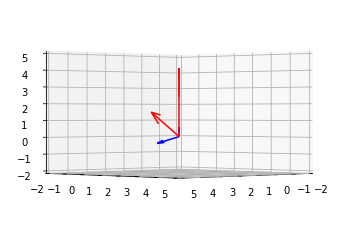

In [ ]:
# Gram-Schmidt Code
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy

# works if columns are linearly independent and/or the matrix is square
# number of columns in A has to be less than or equal to the number of rows of A
def gramschmidt(A, tol = 1e-14):
  
  print("Original matrix:")
  print(A)

  original=copy.deepcopy(A)
  m, n = np.shape(A)[0], np.shape(A)[1]

  #perform SVD
  #if any singular values are zero: return
  #if square matrix, remove the dependent columns 
  if m == n:
    eigs = np.linalg.eigvals(A)
    # new_A = [list(A[:,k]) for k in range(n) if eigs[k] != 0]
    # A = np.array(new_A).transpose()

    #temp column 
    new_A = np.ones((n,1))

    #remove columns if they have 0 eigenvalue
    for k in range(n):
      if np.abs(eigs[k]) > tol:
        new_A = np.concatenate((new_A, A[:,k].reshape((n,1))),axis=1)
    
    #remove temp column 
    A = new_A[:,1:]

    #update number of columns 
    n = np.shape(A)[1]
    
  #if nonsquare
  #landmark selection? to find linearly independent subset
  #normalize the first column (u1)
  A[:,0] = A[:, 0] / norm(A[:,0])

  #loop through each vector in the original basis
  for i in range(1, n):
    Ai = A[:,i]
    #loop through the vectors generated so far of the new basis
    for j in range(0, i):
      Aj = A[:,j]
      #current old vec minus projection of itself onto the current new vector
      Ai = Ai - ((Aj.dot(Ai)) / (norm(Aj)) ** 2) * Aj
    #normalize
    A[:, i] = normalize(Ai)

  # visualization
  # visualize original and resulting 2D vectors
  if n == 2 and m==2:
    total_rows = 2*m
    plotVectors2D(original, A, m=total_rows)
  
  # visualize original and resulting 2D vectors when linear dependence 
  if m==2 and n==1:
    total_rows = n+m
    plotVectors2D(original, A, m=total_rows)

  #visualize original and resulting 3D vectors  
  if n==3 and m==3:
    total_rows = 2*m
    plotVectors3D(original,A, n,m=total_rows)
    
  #visualize original and resulting 3D vectors when linear dependence or rectangular m>n
  if n<3 and m==3:
    total_rows = original.shape[1]+A.shape[1]
    plotVectors3D(original,A, n,m=total_rows)  
  return A

def norm(v):
  return np.sqrt(v.dot(v))

def normalize(v):
  return v / norm(v)

def plotVectors2D(original,orthonormal, m):
  zeros = np.zeros((m,2))
  temp = np.concatenate((np.transpose(original),np.transpose(orthonormal)), axis=0)
  final = np.concatenate((zeros,temp),axis=1)

  X, Y, U, V = zip(*final)

  min = np.floor(np.min((X,Y,U,V))) - 1
  max = np.ceil(np.max((X,Y,U,V))) + 1

  #make axis scales identical 

  plt.figure()
  ax = plt.gca()
  ax.quiver(X,Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["g","g","r","r"])
  ax.set_xlim([min, max])
  ax.set_ylim([min, max])
  plt.gca().set_aspect('equal', adjustable='box')

def plotVectors3D(original,orthonormal, n,m):
  zeros = np.zeros((m,3))
  temp = np.concatenate((np.transpose(original),np.transpose(orthonormal)), axis=0)
  final = np.concatenate((zeros,temp),axis=1)

  mid = original.shape[1]
  X, Y, Z, U, V, W = zip(*final)

  min = np.floor(np.min((X,Y,Z,U,V,W))) - 1
  max = np.ceil(np.max((X,Y,Z,U,V,W))) + 1

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.quiver(X[:mid], Y[:mid], Z[:mid], U[:mid], V[:mid], W[:mid],color=["r"])
  ax.quiver(X[mid:], Y[mid:], Z[mid:], U[mid:], V[mid:], W[mid:],color=["b"])
  ax.set_xlim([min, max])
  ax.set_ylim([min, max])
  ax.set_zlim([min, max])
  ax.view_init(0,45)

# def normalize(v):
#   return duplicate(v) / norm(v)

# # duplicate a list as a copy, not a reference
# def duplicate(lst):
#     # put every element of every row into a list
#     return lst[:]

#square matrix m=n 
A = np.array([[4.0, 3.0], [4.0, 1.5]])

#square matrix m=n, dependent rows
#A = np.array([[3.0, 1.0, 2.0, 2.0], [6.0, 2.0, 4.0, 4.0], [1.0, 5.0, 3.0, 4.0], [5.0, 5.1, 3.1, 2.1]])

#rectangular matrix, m>n, linearlly independent
#A = np.array([[1.0,1.0,1.0],[2.0,3.0,5.0]]) .reshape((3,2))

#rectangular matrix, m<n.   -------- doesn't work yet!
#A = np.array([[1.0,1.0,1.0],[2.0,3.0,5.0]]) 

#visualizing 2D
#A = np.array([[4.0, 3.0], [4.0, 1.5]])

#visualizing 2D with dependence
#A = np.array([[4.0, 3.0], [2.0, 1.5]])

#visualizing 3D 
#A = np.array([[1.0,  1.0, 0], [3.0, 0.0, 0], [2.0, 1, 2.0]])

#visualizing 3D with dependence
#A = np.array([[1.0,  0.0, 0], [3.0, 0.0, 0], [2.0, 1, 2.0]])

Q = gramschmidt(A)
print("Orthonormal matrix Q:")
print(Q)
print("Q^T * Q:")
print(np.round(Q.transpose().dot(Q)))



#2D Steps of Gram-Schmidt

In [ ]:
# 2D Steps of Gram-Schmidt
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy
import time

def norm(v):
  return np.sqrt(v.dot(v))

def normalize(v):
  return v / norm(v)

def stepwiseGS(A, tol = 1e-14):

  print("Original Basis")
  print(A)

  m,n = A.shape[0],A.shape[1]

  if m != 2 and n!=2:
    return "enter square matrix"
  
  #set type of A to float
  A=A.astype("float")
  original=copy.deepcopy(A)

  #if square matrix, remove the dependent columns 
  eigs = np.linalg.eigvals(A)

  #temp column 
  new_A = np.ones((n,1))

  #remove columns if they have 0 eigenvalue
  for k in range(n):
    if np.abs(eigs[k]) > tol:
      new_A = np.concatenate((new_A, A[:,k].reshape((n,1))),axis=1)
    
  #remove temp column 
  A = new_A[:,1:]

  m,n = A.shape[0],A.shape[1]
  if n==1:
    A[:, 0] = normalize(A[:,0])
    print("Original basis is not linearly independent.")
    print("Orthonormal basis")
    print(A)
    plt.figure()
    ax = plt.gca()
    B = [np.concatenate(([0,0],A[:, 0]))]
    X, Y, U, V = zip(*B)
    min = np.floor(np.min((X,Y,U,V))) - 1
    max = np.ceil(np.max((X,Y,U,V))) + 1
    Q = ax.quiver(X,Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["g","r"])
    ax.set_xlim([min, max])
    ax.set_ylim([min, max])
    plt.gca().set_aspect('equal', adjustable='box')
    return



  proj = ((A[:,0].dot(A[:,1])) / (norm(A[:,0])) ** 2) * A[:,0]
  A[:,1] = A[:,1] - ((A[:,0].dot(A[:,1])) / (norm(A[:,0])) ** 2) * A[:,0]



  #plot 1
  plt.figure()
  ax = plt.gca()
  B = [np.concatenate(([0,0],original[:,0])), np.concatenate(([0,0],original[:,1]))]
  X, Y, U, V = zip(*B)
  min = np.floor(np.min((X,Y,U,V))) - 1
  max = np.ceil(np.max((X,Y,U,V))) + 1
  Q = ax.quiver(X,Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["g","r"])
  ax.set_xlim([min, max])
  ax.set_ylim([min, max])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.pause(1)


  #plot 2
  print("The green vector points in the direction of the first orthonormal basis vector.")
  print("Projecting the red vector onto the green vector, and subtracting the result from the red vector yields the blue vector." )
  print("The blue vector is orthogonal to the green vector.")
  plt.figure()
  ax = plt.gca()
  B = [np.concatenate(([0,0],original[:,0])), np.concatenate(([0,0],original[:,1])), np.concatenate((proj, A[:,1]))]
  X, Y, U, V = zip(*B)
  ax.quiver(X,Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["g","r","b"])
  ax.set_xlim([min, max])
  ax.set_ylim([min, max])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.pause(1)

  #plot 3
  print("Repositioning the blue vector")
  plt.figure()
  ax = plt.gca()
  B = [np.concatenate(([0,0],original[:,0])), np.concatenate(([0,0],original[:,1])), np.concatenate(([0,0],A[:,1]))]
  X, Y, U, V = zip(*B)
  ax.quiver(X,Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["g","r","b"])
  ax.set_xlim([min, max])
  ax.set_ylim([min, max])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.pause(1)

  #normalize
  A[:, 0] = normalize(A[:,0])
  A[:, 1] = normalize(A[:,1])

  #plot 4
  print("Normalizing the green and blue vectors, the vectors form an orthonormal basis that spans the same space as the original basis.")
  print("Othonormal Basis:")
  print(A)
  plt.figure()
  ax = plt.gca()
  B = [np.concatenate(([0,0],A[:,0])), np.concatenate(([0,0],A[:,1]))]
  X, Y, U, V = zip(*B)
  ax.quiver(X,Y, U, V, angles='xy', scale_units='xy', scale=1, color = ["g","b"])
  ax.set_xlim([min, max])
  ax.set_ylim([min, max])
  plt.gca().set_aspect('equal', adjustable='box')
  plt.pause(1)



Original Basis
[[4.  3. ]
 [4.  1.5]]


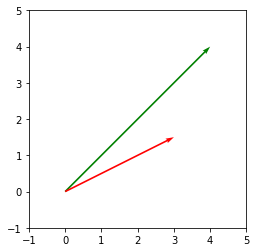

The green vector points in the direction of the first orthonormal basis vector.
Projecting the red vector onto the green vector, and subtracting the result from the red vector yields the blue vector.
The blue vector is orthogonal to the green vector.


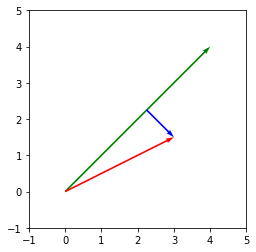

Repositioning the blue vector


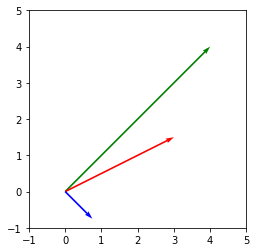

Normalizing the green and blue vectors, the vectors form an orthonormal basis that spans the same space as the original basis.
Othonormal Basis:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


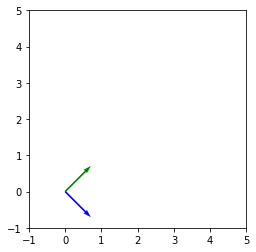

In [ ]:
stepwiseGS(np.array([[4.0, 3.0], [4.0, 1.5]]))

#Questions
What happens when the columns of $A$ are linearly dependent? Do we
* drop the dependent columns before orthogonalizing?
* remove zero columns afterward?

How can we get the basis for a nonsquare matrix? How else can we identify (for removal) dependent columns of a nonsquare matrix?

Are bases defined for vector spaces that are not $\mathbb{R}^n$?